***
***
***

# A1: Regression-Based Analysis (Individual)
<strong style="font-size: 24px">Machine Learning</strong><br><br>
<b style="font-size: 18px">Student : Yu Huang</b> <br>
Hult International Business School

***
***
***

<h2>STEP I: Dataset Exploration</h2><br>

<h3>Part I: Fundamental Dataset Exploration</h3><br>

Import the following packages:
* pandas (as pd)
* random (as rand)
* seaborn (as sns)
* matplotlib.pyplot (as plt)

Then, load the Apprentice_Chef_Dataset into Python.

################################################################################
Import Packages

################################################################################

In [1]:
# importing libraries
import pandas                  as pd # data science essentials
import random                  as rand
import matplotlib.pyplot       as plt # data visualization
import seaborn                 as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from  sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models

# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#################################################################################
Load Data
################################################################################

In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)     
pd.set_option('display.max_columns', 500)  
pd.set_option('display.width', 1000)       


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
original_df = pd.read_excel(file)

 Display general information about each variable, including types and number of non-missing values.

In [3]:
# INFOrmation about each variable
chef = original_df.copy()
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

Insight from the Info: There are 29 variables , 1946 customers were recorded. There is missing value on FAMILY_NAME. 

 DESCRIBE each quantitative column using descriptive statistics. Round to two decimal places.

In [4]:
#descriptive statistics
chef.iloc[:,1:].describe().round(2)

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


***
***

<h3>Part II: Missing Value Analysis and Imputation</h3><br>

Show the number of missing values in the dataset.<br>
<em>My goal is to check if a value is missing (i.e. is null) and then add the values together column-wise.</em>


In [5]:
chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

I already checked the only missing value here is Family name. So let me check the name,first name, family name as a DataFrame, find the appropriate way to fulfill the missing value of family name.

In [6]:
# flag the missing value
chef['m_FAMILY_NAME'] = chef['FAMILY_NAME'].isnull().astype(int)
chef.shape

(1946, 30)

As far, I found that the name didn't include the family name, only include the job in the bracket. So I flagged the missing family name as m_FAMILY_NAME.

***
***

<h3>Part III: Data Types</h3>

Print() the quantiles for each quantitative variable in the dataset. 

As we see, from the quantile analysis, 80% customers spent less than $3000 in one year for the orders.

***
***


Make assumptions on whether or not the data type of each variable is <strong>CONTINUOUS/INTERVAL</strong>, <strong>BINARY</strong>, <strong>COUNT</strong>, <strong>CATEGORICAL</strong>, or <strong>DISCRETE</strong>. Use the quantiles above and the housing.info() code to help make decisions.

In [7]:
#chef.info()

In [8]:
#chef['TOTAL_PHOTOS_VIEWED'].value_counts()

In [9]:
#chef['LATE_DELIVERIES'].value_counts()

In [10]:
#chef['EARLY_DELIVERIES'].value_counts()

In [11]:
#chef['WEEKLY_PLAN'].value_counts()

It looks that we delivered BEFORE the alloted delivery time is not performing well. I will flag the EARLY_DELIVERIES as 1167 is 0.

In [12]:
#chef['PC_LOGINS'].value_counts()

In [13]:
#chef['MOBILE_LOGINS'].value_counts()

Compare Count of logins on the mobile platform (app) with web platform (website), customers prefer using website to login in.

In [14]:
#chef['CANCELLATIONS_BEFORE_NOON'].value_counts()

In [15]:
#chef['CANCELLATIONS_AFTER_NOON'].value_counts()

Compare the Number of meals canceled before 12 PM with after 12 PM , we can see full refund before noon caused 2/3 customers canceled order, and much more frequently than after noon.

In [16]:
#chef['MOBILE_NUMBER'].value_counts()

As we see, most customers  registered with a mobile.

In [17]:
#chef['UNIQUE_MEALS_PURCH'].value_counts()

Insight: From counting unique meals purchase, we can see only three meal sets are most popular, and normally less than 9 different meal sets would be ordered. But not sure it is because only 9 different meal sets as best-selling products to be ordered, or Customers' dining habits result in a focus on less than nine products at most. If it is the first reason, I will suggest canceling the 9-18 meal sets and only retaining the classic 9 meal sets to save cost.

In [18]:
#chef['CONTACTS_W_CUSTOMER_SERVICE'].value_counts()

Insight: Base on times a customer made contact with customer service, we can see the most frequency times to contact with customer service are between 4 to 12.

In [19]:
"""

# CONTINUOUS OR INTERVAL
 REVENUE
 AVG_TIME_PER_SITE_VISIT
 AVG_PREP_VID_TIME
 
 
 BINARY
 CROSS_SELL_SUCCESS
 MOBILE_NUMBER
 TASTES_AND_PREFERENCES
 PACKAGE_LOCKER
 REFRIGERATED_LOCKER


# COUNT
 TOTAL_MEALS_ORDERED
 UNIQUE_MEALS_PURCH
 CONTACTS_W_CUSTOMER_SERVICE
 PRODUCT_CATEGORIES_VIEWED
 CANCELLATIONS_BEFORE_NOON
 CANCELLATIONS_AFTER_NOON
 PC_LOGINS
 MOBILE_LOGINS
 WEEKLY_PLAN 
 LATE_DELIVERIES
 EARLY_DELIVERIES
 LARGEST_ORDER_SIZE
 AVG_CLICKS_PER_VISIT(?)
 TOTAL_PHOTOS_VIEWED
 

# CATEGORICAL
 MASTER_CLASSES_ATTENDED(?? 0,1,2,3)
 MEDIAN_MEAL_RATING(?? 12345)
 


# DISCRETE
 EMAIL
 NAME
 FIRST_NAME
 FAMILY_NAME
 FOLLOWED_RECOMMENDATIONS_PCT
 

"""

'\n\n# CONTINUOUS OR INTERVAL\n REVENUE\n AVG_TIME_PER_SITE_VISIT\n AVG_PREP_VID_TIME\n \n \n BINARY\n CROSS_SELL_SUCCESS\n MOBILE_NUMBER\n TASTES_AND_PREFERENCES\n PACKAGE_LOCKER\n REFRIGERATED_LOCKER\n\n\n# COUNT\n TOTAL_MEALS_ORDERED\n UNIQUE_MEALS_PURCH\n CONTACTS_W_CUSTOMER_SERVICE\n PRODUCT_CATEGORIES_VIEWED\n CANCELLATIONS_BEFORE_NOON\n CANCELLATIONS_AFTER_NOON\n PC_LOGINS\n MOBILE_LOGINS\n WEEKLY_PLAN \n LATE_DELIVERIES\n EARLY_DELIVERIES\n LARGEST_ORDER_SIZE\n AVG_CLICKS_PER_VISIT(?)\n TOTAL_PHOTOS_VIEWED\n \n\n# CATEGORICAL\n MASTER_CLASSES_ATTENDED(?? 0,1,2,3)\n MEDIAN_MEAL_RATING(?? 12345)\n \n\n\n# DISCRETE\n EMAIL\n NAME\n FIRST_NAME\n FAMILY_NAME\n FOLLOWED_RECOMMENDATIONS_PCT\n \n\n'

***
***

Write a code to DYNAMICALLY print the value counts for each variable that has been assumed categorical.

In [20]:
print(f"""

MASTER_CLASSES_ATTENDED
-------------
{chef['MASTER_CLASSES_ATTENDED'].value_counts().sort_index()}


MEDIAN_MEAL_RATING
-------------
{chef['MEDIAN_MEAL_RATING'].value_counts().sort_index()}


""")



MASTER_CLASSES_ATTENDED
-------------
0    932
1    858
2    150
3      6
Name: MASTER_CLASSES_ATTENDED, dtype: int64


MEDIAN_MEAL_RATING
-------------
1      99
2     487
3    1087
4     260
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64





***
***

<h2>STEP II: Feature Engineering</h2>



#################################################################################
Feature Engineering and (optional) Dataset Standardization
################################################################################

<h3>Part I: Working with Names</h3><br>

Define the function that can split name, automatically sum the length of name and add in new column.

In [21]:
def split_name(col, df, sep=' ',new_col_name = 'number_of_names'):
    """
    Split the value of a string in series(column of DataFrame), and sum of the number of result items.
    Automatically append summed column into original DataFrame.
    Parameter:
    --------------
    col: The column need to be splited
    df:  DataFrame where column is located
    sep: split by , default ' '
    new_col_name: the name of new column after summing split, default 'number of names'
    --------------
    """
    df[new_col_name] = 0
    for index,val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split())

In [22]:
split_name(col='NAME',df=chef)
chef['number_of_names'].value_counts()

2    1201
1     591
3      98
5      35
6      12
4       9
Name: number_of_names, dtype: int64

In [23]:
chef['number_of_names_out'] = 0
condition = chef.loc[0:,'number_of_names_out'][(chef['number_of_names'] == 5) |
                                               (chef['number_of_names'] == 6) |
                                               (chef['number_of_names'] == 4)]
chef['number_of_names_out'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

In [24]:
chef.shape

(1946, 32)

<h3>Part II: Working with Email Addresses</h3><br>




<h4>1: Group email to Categorical Data</h4><br>
1.Create an empty list (placeholder_lst)<br>
2.Loop over each email in placeholder_lst and SPLIT each personal email based on a common attribute ('@' and use it to SPLIT email and domain).<br>
3.APPEND placeholder_lst with split_email.<br>
4.Convert placeholder_lst into a DataFrame.<br>
5.Display the DataFrame and check your results.<br>


In [25]:
placeholder_lst=[]
for index,email in chef.iterrows():
    split_email = chef.loc[index,'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)
email_df = pd.DataFrame(placeholder_lst)  
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


Concatenate the email domains as a new column in the email_df DataFrame. Name this column email_domain. Then, print the value counts for each domain.

In [26]:
email_df.columns = ['not_use','email_domain']
email_df

,not_use,email_domain
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


Now that email domains have been extracted, let's go one step further to aggregate domains into higher-level categories.  this helps address issues when some categories have small sample sizes.Let's set emails to different group.

In [27]:
# create new dataframe chef_m include column 'domain_group'
chef_m = chef.copy()
# email domain types
personal_email_domains = ['@gmail.com','@yahoo.com','@protonmail.com']
professional_email_domains  = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com',
                               '@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com'
                               '@exxon.com','@ge.org','@goldmansacs.com','@ibm.com','@intel.com','@jnj.com'
                               '@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com'
                               '@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com'
                               '@verizon.com','@visa.com','@walmart.com']
junk_email_domain = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []    

# looping to group observations by domain type
for domain in email_df['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal_email')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional_email')
        elif '@' + domain in junk_email_domain:
            placeholder_lst.append('junk_email')    
        else:
            placeholder_lst.append('unknown_email')


# concatenating with email_df
email_df['domain_group'] = pd.Series(placeholder_lst)  #if dataframe only one column, that is series
# # concatenating domain_group with chef DataFrame
chef_m = pd.concat([chef_m, email_df['domain_group']],axis=1)
chef_m.shape


(1946, 33)

***
***

<h4>2: Encoding Categorical Data- dummy email group</h4><br>


In [28]:
# create gummies base on domain group
one_email = pd.get_dummies(chef_m['domain_group'])
one_email

,junk_email,personal_email,professional_email,unknown_email
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1941,0,1,0,0
1942,0,1,0,0
1943,0,1,0,0
1944,0,1,0,0


In [29]:
one_email.sum()

junk_email            389
personal_email        861
professional_email    489
unknown_email         207
dtype: int64

In [30]:
# create new dataframe chef_n include different email types' columns
chef_n = chef.join([one_email])
chef_n.shape

(1946, 36)

In [31]:
chef = chef_n.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','unknown_email'], axis=1)

In [32]:
chef.shape

(1946, 31)

In [33]:
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'number_of_names', 'number_of_names_out', 'junk_email', 'personal_email', 'professional_email'], dtype='object')

In [34]:
# # saving results
# chef.to_excel('chef_feature_rich.xlsx',
#                  index = False)

In [35]:
# # loading saved file
# chef = pd.read_excel('chef_feature_rich.xlsx')

<br>
<h3>Part III: One-hot encoding for categorial features</h3><br>

In [36]:
#chef.columns

In [37]:
#chef.shape

In [38]:
# create dummies base on median rate
one_MEDIAN_MEAL_RATING = pd.get_dummies(chef['MEDIAN_MEAL_RATING'])
one_MEDIAN_MEAL_RATING.columns =  ['MEDIAN_MEAL_RATING_1',
                                   'MEDIAN_MEAL_RATING_2',
                                   'MEDIAN_MEAL_RATING_3',
                                   'MEDIAN_MEAL_RATING_4',
                                   'MEDIAN_MEAL_RATING_5']
one_MEDIAN_MEAL_RATING

,MEDIAN_MEAL_RATING_1,MEDIAN_MEAL_RATING_2,MEDIAN_MEAL_RATING_3,MEDIAN_MEAL_RATING_4,MEDIAN_MEAL_RATING_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1941,0,0,1,0,0
1942,0,0,1,0,0
1943,0,1,0,0,0
1944,0,1,0,0,0


In [39]:
chef = chef.join([one_MEDIAN_MEAL_RATING])

In [40]:
chef.shape

(1946, 36)



<br>
<h3>Part IV: Outlier Analysis</h3><br>
let's engineer some new features in the hopes of outperforming our current predictive results.<br><br>
Plot all the features to see the trend.


In [41]:
# correlation heatmap
# a = chef[['REVENUE','CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
#           'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
#           'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
#           'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 
#           'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
#           'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
#           'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']]
# creating a (Pearson) correlation matrix
# a_corr = a.corr().round(2)
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(a_corr,
#             cmap = 'coolwarm',
#             square = True,
#             annot = True,
#             linecolor = 'black',
#             linewidths = 0.5)


# plt.savefig('chef Correlation Heatmap.png')
# plt.show()

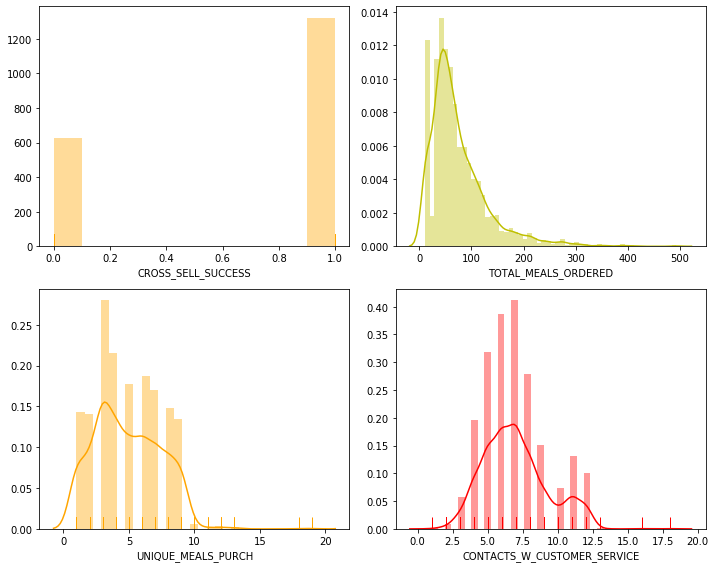

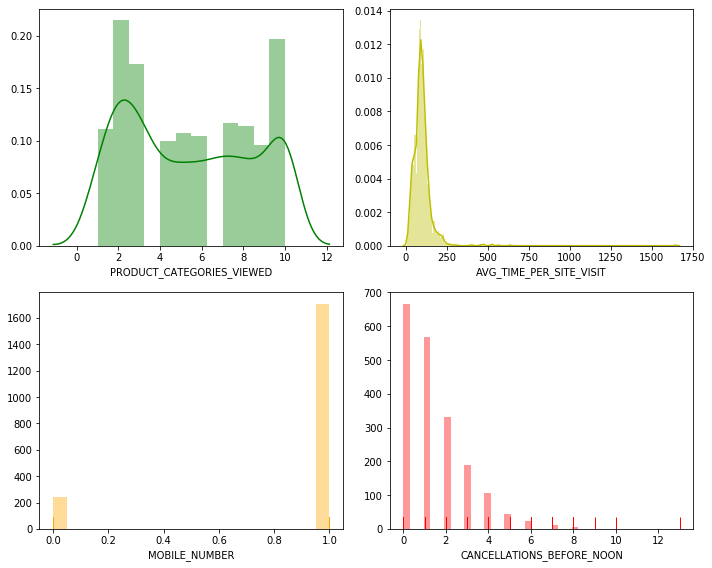

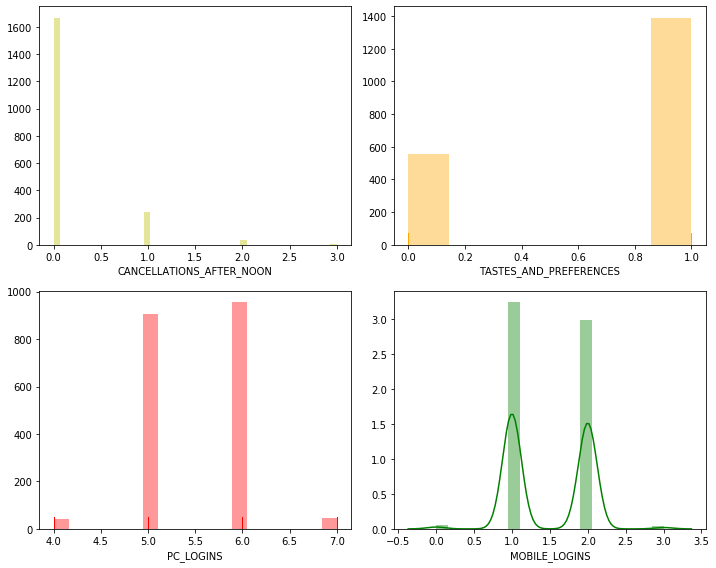

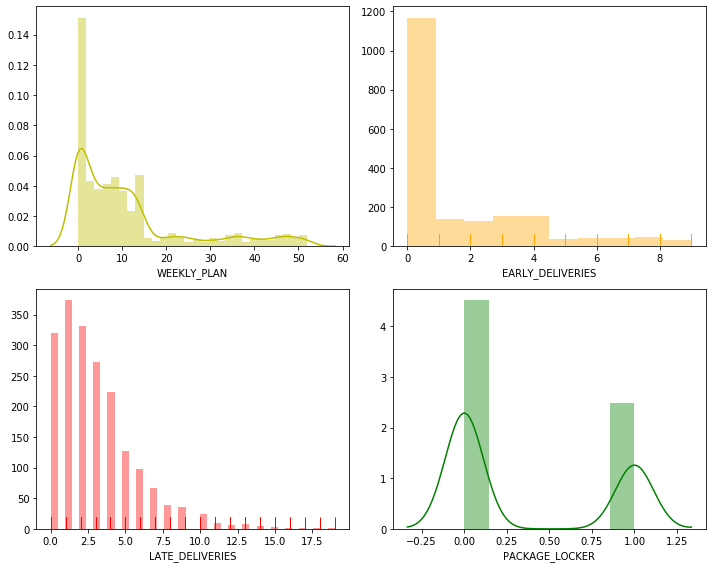

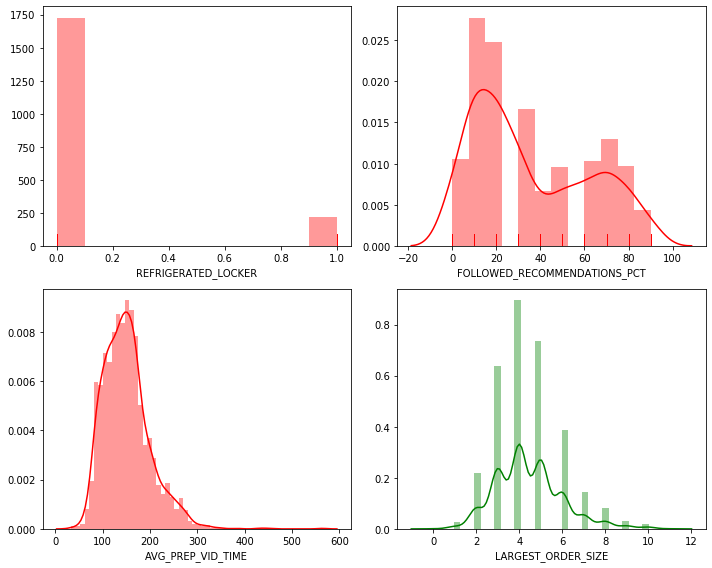

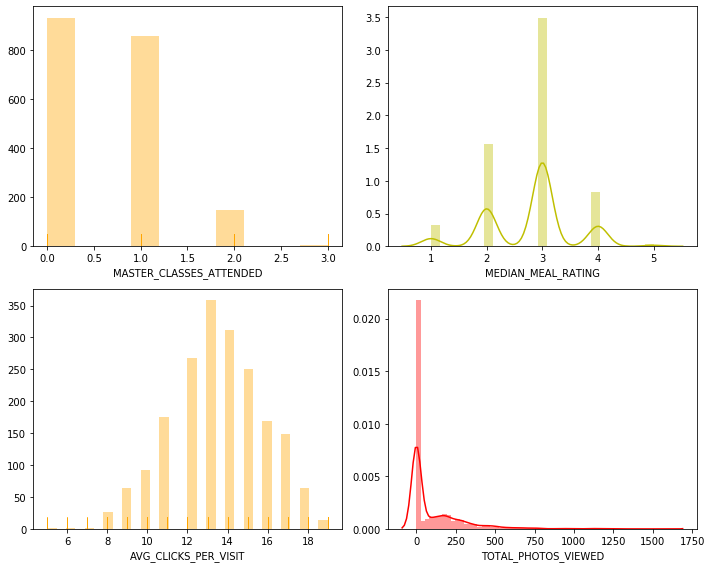

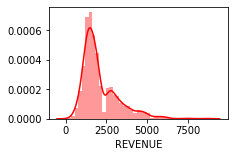

In [42]:
########################
# Visual EDA (Histograms)
########################1

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)                                #subplot(numRows, numCols, plotNum)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Chef Data Histograms 1 of 7.png')
plt.show()

########################
########################2

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = True,
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['MOBILE_NUMBER'],
             bins  = 20,
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Chef Data Histograms 2 of 7.png')
plt.show()

########################
########################3

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             #bins  = 'fd',
             kde   = False,
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('MOBILE_LOGINS')
plt.tight_layout()
plt.savefig('Housing Data Histograms 3 of 7.png')
plt.show()

########################
########################4

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             kde  = True,
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Chef Data Histograms 4 of 7.png')
plt.show()

########################
########################5

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REFRIGERATED_LOCKER'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins = 'fd',
             kde  = True,
             rug  = False,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Chef Data Histograms 5 of 7.png')
plt.show()

########################
########################6

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)                                #subplot(numRows, numCols, plotNum)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = True,
             rug   = False,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('Chef Data Histograms 6 of 7.png')
plt.show()

########################
########################7

plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             kde   = True,
             rug   = False,
             color = 'r')
plt.xlabel('REVENUE')
plt.tight_layout()
plt.savefig('Chef Data Histograms 7 of 7.png')
plt.show()

########################

In [43]:
# I see the CONTACTS_W_CUSTOMER_SERVICE with additional outlier peak between[10,11,12], I want to flag this little peak
chef['out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'] = 0
condition = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'][(chef['CONTACTS_W_CUSTOMER_SERVICE'] == 10) |
                                                                   (chef['CONTACTS_W_CUSTOMER_SERVICE'] == 11) |
                                                                   (chef['CONTACTS_W_CUSTOMER_SERVICE'] == 12)]
chef['out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'].replace(to_replace = condition,
                                                        value      = 1,
                                                        inplace    = True)


In [44]:
# I see the MOBILE_LOGINS with obvious peak of [1,2], I want to flag this little peak
chef['flag_MOBILE_LOGINS'] = 0
condition = chef.loc[0:,'flag_MOBILE_LOGINS'][(chef['MOBILE_LOGINS'] == 1) |
                                              (chef['MOBILE_LOGINS'] == 2) ]
chef['flag_MOBILE_LOGINS'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

In [45]:
# I see the MOBILE_LOGINS with obvious peak of [1,2], I want to flag this little peak
chef['flag_PC_LOGINS'] = 0
condition = chef.loc[0:,'flag_PC_LOGINS'][(chef['PC_LOGINS'] == 5) |
                                          (chef['PC_LOGINS'] == 6) ]
chef['flag_PC_LOGINS'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

In [46]:
# I see the EARLY_DELIVERIES with obvious peak at 0, I want to flag this little peak
chef['flag_EARLY_DELIVERIES'] = 0
condition = chef.loc[0:,'flag_EARLY_DELIVERIES'][(chef['EARLY_DELIVERIES'] == 0)]
chef['flag_EARLY_DELIVERIES'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

In [47]:
# I see the WEEKLY_PLAN with obvious peak at 0, I want to flag this little peak
chef['flag_WEEKLY_PLAN'] = 0
condition = chef.loc[0:,'flag_WEEKLY_PLAN'][(chef['WEEKLY_PLAN'] == 0)]
chef['flag_WEEKLY_PLAN'].replace(to_replace = condition,
                                 value      = 1,
                                 inplace    = True)

In [48]:
# I see the CANCELLATIONS_AFTER_NOON with obvious peak at 0, I want to flag this little peak
chef['flag_CANCELLATIONS_AFTER_NOON'] = 0
condition = chef.loc[0:,'flag_CANCELLATIONS_AFTER_NOON'][(chef['CANCELLATIONS_AFTER_NOON'] == 0)]
chef['flag_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                              value      = 1,
                                              inplace    = True)

In [49]:
chef.shape

(1946, 42)

we are going to assume outlier thresholds base on above plots. Run the following code to generate the thresholds and create outlier flag columns.

In [50]:
# setting outlier thresholds
TOTAL_MEALS_ORDERED_hi          = 150
UNIQUE_MEALS_PURCH_hi           = 9
CONTACTS_W_CUSTOMER_SERVICE_lo  = 3
CONTACTS_W_CUSTOMER_SERVICE_hi  = 9
AVG_TIME_PER_SITE_VISIT_hi      = 250
CANCELLATIONS_BEFORE_NOON_hi    = 8
CANCELLATIONS_AFTER_NOON_hi     = 2 
WEEKLY_PLAN_hi                  = 15
LATE_DELIVERIES_hi              = 10
AVG_PREP_VID_TIME_hi            = 300
LARGEST_ORDER_SIZE_hi           = 8
MASTER_CLASSES_ATTENDED_hi      = 2
AVG_CLICKS_PER_VISIT_lo         = 8
AVG_CLICKS_PER_VISIT_hi         = 18
TOTAL_PHOTOS_VIEWED_hi          = 500


##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
chef['out_TOTAL_MEALS_ORDERED'] = 0                                      
condition_hi = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi] 
chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)


# UNIQUE_MEALS_PURCH
chef['out_UNIQUE_MEALS_PURCH'] = 0                                   
condition_hi = chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi] 
chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE_hi
chef['out_CONTACTS_W_CUSTOMER_SERVICE_hi'] = 0
condition_hi = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE_hi'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
chef['out_CONTACTS_W_CUSTOMER_SERVICE_hi'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE_lo
chef['out_CONTACTS_W_CUSTOMER_SERVICE_lo'] = 0
condition_lo = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE_lo'][chef['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]
chef['out_CONTACTS_W_CUSTOMER_SERVICE_lo'].replace(to_replace = condition_lo,
                                                   value      = 1,
                                                   inplace    = True) 


# AVG_TIME_PER_SITE_VISIT
chef['out_AVG_TIME_PER_SITE_VISIT'] = 0                                      
condition_hi = chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi] 
chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# CANCELLATIONS_BEFORE_NOON
chef['out_CANCELLATIONS_BEFORE_NOON'] = 0                                      
condition_hi = chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi] 
chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)  

# CANCELLATIONS_AFTER_NOON
chef['out_CANCELLATIONS_AFTER_NOON'] = 0                                      
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi] 
chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True) 

#WEEKLY_PLAN
chef['out_WEEKLY_PLAN'] = 0                                      
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_hi] 
chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
chef['out_LATE_DELIVERIES'] = 0                                      
condition_hi = chef.loc[0:,'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] > LATE_DELIVERIES_hi] 
chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
chef['out_AVG_PREP_VID_TIME'] = 0                                      
condition_hi = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi] 
chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)

# LARGEST_ORDER_SIZE
chef['out_LARGEST_ORDER_SIZE'] = 0                                      
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi] 
chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# MASTER_CLASSES_ATTENDED
chef['out_MASTER_CLASSES_ATTENDED'] = 0                                      
condition_hi = chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi] 
chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# AVG_CLICKS_PER_VISIT_hi
chef['out_AVG_CLICKS_PER_VISIT_hi'] = 0
condition_hi = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT_hi'][chef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
chef['out_AVG_CLICKS_PER_VISIT_hi'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)


# AVG_CLICKS_PER_VISIT_lo
chef['out_AVG_CLICKS_PER_VISIT_lo'] = 0
condition_lo = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT_lo'][chef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]
chef['out_AVG_CLICKS_PER_VISIT_lo'].replace(to_replace = condition_lo,
                                            value      = 1,
                                            inplace    = True)


# TOTAL_PHOTOS_VIEWED
chef['out_TOTAL_PHOTOS_VIEWED'] = 0                                      
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi] 
chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)




In [51]:
# # saving results
# chef.to_excel('chef_feature_rich.xlsx',
#                  index = False)
# # loading saved file
# chef = pd.read_excel('chef_feature_rich.xlsx')


In [52]:
chef.shape

(1946, 57)

***
***

<h3>Part V - Developing Trend-Based Features</h3>

<br>
<strong>Purpose: Develop thresholds at points where the trend changes.</strong><br><br>
My goal here is to identify where a variable's trend changes in terms of its relationship with what we are trying to predict (in this case, Revenue). In other words, if we analyze a scatterplot and see that the trend between two variables is not consistent, we can capture this information and it may help us improve our predictions as well as help generate insights. We can decide to do this at any point in the graph.<br><br>
Let's look at some scatterplots between Revenue and our response variable. 

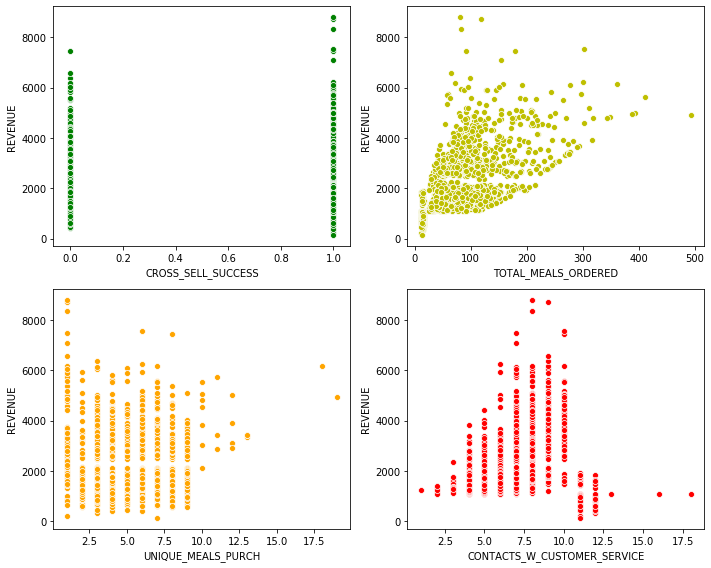

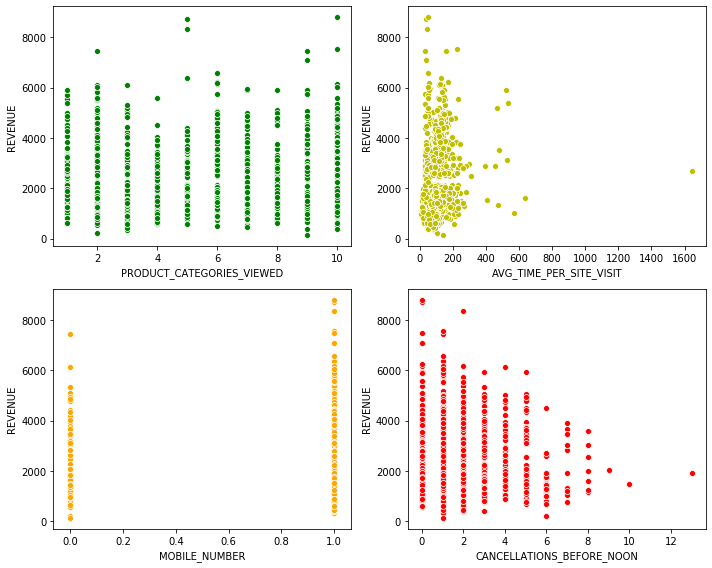

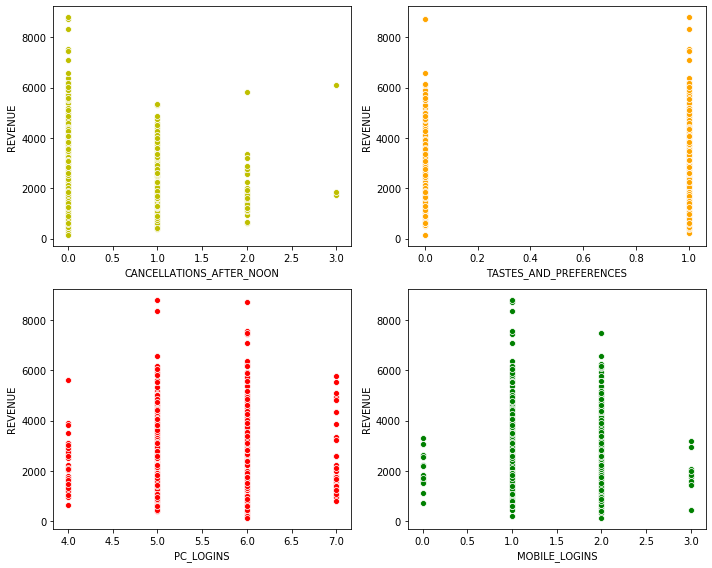

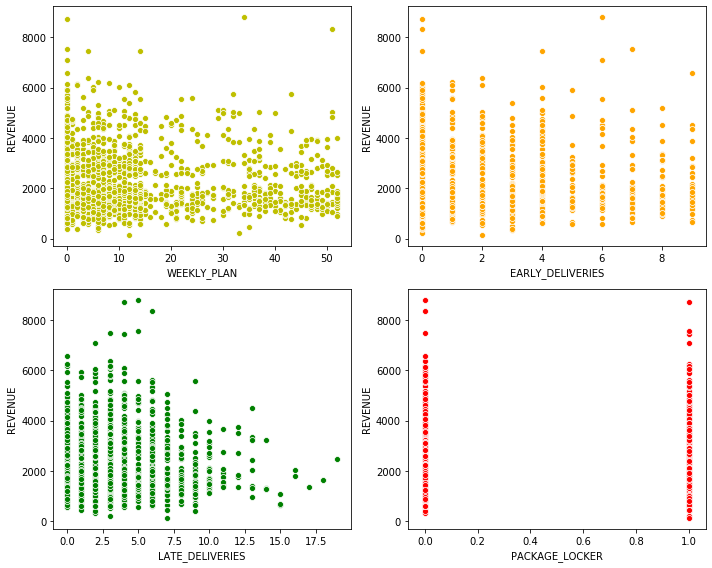

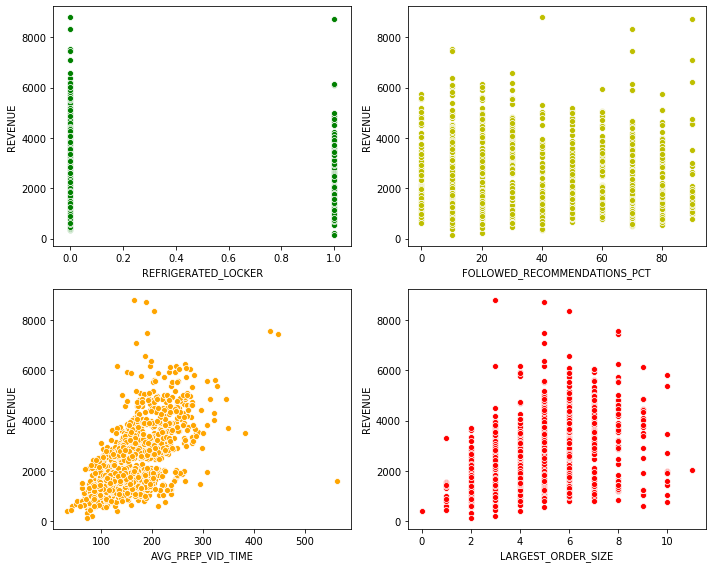

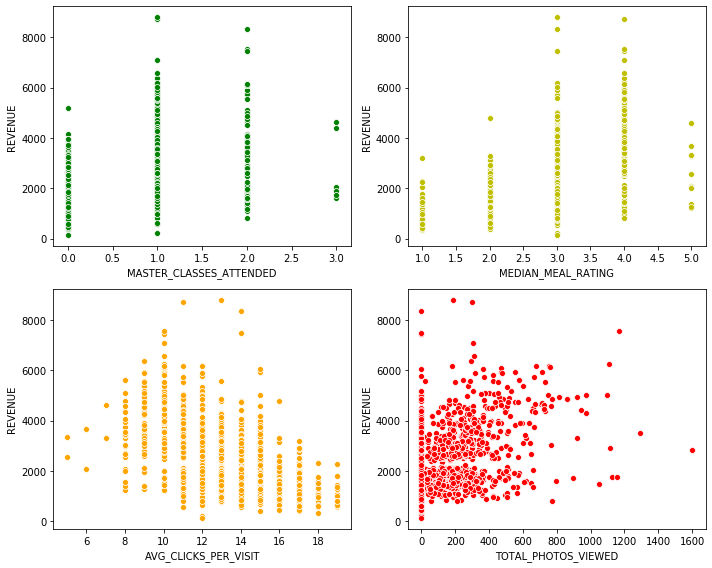

In [53]:
########################
# Visual EDA (Scatterplots)
########################1

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CROSS_SELL_SUCCESS'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Chef Data Scatterplots 1 of 7.png')
plt.show()

########################
########################2

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['MOBILE_NUMBER'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Chef Data Scatterplots 2 of 7.png')
plt.show()

########################
########################3

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TASTES_AND_PREFERENCES'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('MOBILE_LOGINS')
plt.tight_layout()
plt.savefig('Chef Data Scatterplots 3 of 7.png')
plt.show()

########################
########################4

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')
########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('LATE_DELIVERIES')
########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['PACKAGE_LOCKER'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('PACKAGE_LOCKER')

plt.tight_layout()
plt.savefig('Chef Data Scatterplots 4 of 7.png')
plt.show()

########################
########################5

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['REFRIGERATED_LOCKER'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Chef Data Scatterplots 5 of 7.png')
plt.show()

########################
########################6
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('Chef Data Scatterplots 6 of 7.png')
plt.show()

########################
########################7

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = chef['out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'],
#                 y = chef['REVENUE'],
#                 color = 'g')
# plt.xlabel('out_CONTACTS_W_CUSTOMER_SERVICE_outpeak')

# ########################

# plt.subplot(2, 2, 2)
# sns.scatterplot(x = chef['flag_MOBILE_LOGINS'],
#                 y = chef['REVENUE'],
#                 color = 'y')
# plt.xlabel('flag_MOBILE_LOGINS')

# ########################

# plt.subplot(2, 2, 3)
# sns.scatterplot(x = chef['flag_PC_LOGINS'],
#                 y = chef['REVENUE'],
#                 color = 'orange')
# plt.xlabel('flag_PC_LOGINS')

# ########################
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = chef['flag_EARLY_DELIVERIES'],
#                 y = chef['REVENUE'],
#                 color = 'r')
# plt.xlabel('flag_EARLY_DELIVERIES')
# plt.tight_layout()
# plt.savefig('Chef Data Scatterplots 1 of 7.png')
# plt.show()

# ########################



After observing the scatterplots above, develop trend-based thresholds based on what you see.

In [54]:
#chef['TOTAL_MEALS_ORDERED'][chef['REVENUE']<2000].min()

In [55]:
# setting trend-based thresholds
# CONTACTS_W_CUSTOMER_SERVICE_change_hi     = 10  #trend changes above this point 
LARGEST_ORDER_SIZE_change_hi              = 5   # trend changes above this point                      
# LATE_DELIVERIES_change_hi                 =15   # trend changes above this point
AVG_CLICKS_PER_VISIT_change_hi            =10   # trend changes above this point
TOTAL_PHOTOS_VIEWED_change_hi             =800  # data scatters above this point
TOTAL_MEALS_ORDERED_change_lo             = 20

#MOBILE_LOGINS_change_at                   = 1   # only different at 0
# MEDIAN_MEAL_RATING_change_at              = 4   
TOTAL_PHOTOS_VIEWED_change_at             = 0   # zero inflated
# PC_LOGINS_change_at                       = 4   # only different at 4
MASTER_CLASSES_ATTENDED_change_at         = 1   # only different at 3

In [56]:
chef.shape

(1946, 57)

Develop trend-based features using my chosen thresholds changes above.

In [57]:
##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# greater than sign

# # CONTACTS_W_CUSTOMER_SERVICE
# chef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
# condition = chef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change_hi]

# chef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
#                                                    value      = 1,
#                                                    inplace    = True)



# LARGEST_ORDER_SIZE
chef['change_LARGEST_ORDER_SIZE'] = 0
condition = chef.loc[0:,'change_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_change_hi]

chef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                          value      = 1,
                                          inplace    = True)


# # LATE_DELIVERIES
# chef['change_LATE_DELIVERIES'] = 0
# condition = chef.loc[0:,'change_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] > LATE_DELIVERIES_change_hi]

# chef['change_LATE_DELIVERIES'].replace(to_replace = condition,
#                                        value      = 1,
#                                        inplace    = True)

# TOTAL_MEALS_ORDERED
chef['change_TOTAL_MEALS_ORDERED'] = 0
condition = chef.loc[0:,'change_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_change_lo]

chef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)

########################################
## change at threshold                ##
########################################

# double-equals sign

# # MOBILE_LOGINS
# chef['change_MOBILE_LOGINS'] = 0
# condition = chef.loc[0:,'change_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] == MOBILE_LOGINS_change_at]

# chef['change_MOBILE_LOGINS'].replace(to_replace = condition,
#                                      value      = 1,
#                                      inplace    = True)
# #PC_LOGINS
# chef['change_PC_LOGINS'] = 0
# condition = chef.loc[0:,'change_PC_LOGINS'][chef['PC_LOGINS'] == PC_LOGINS_change_at]

# chef['change_PC_LOGINS'].replace(to_replace = condition,
#                                  value      = 1,
#                                  inplace    = True)

# # MEDIAN_MEAL_RATING 
# chef['change_MEDIAN_MEAL_RATING'] = 0
# condition = chef.loc[0:,'change_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change_at]

# chef['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
#                                           value      = 1,
#                                           inplace    = True)


# TOTAL_PHOTOS_VIEWED
chef['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = chef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

chef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)

# MASTER_CLASSES_ATTENDED
chef['change_MASTER_CLASSES_ATTENDED'] = 0
condition = chef.loc[0:,'change_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_change_at]

chef['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                               value      = 1,
                                               inplace    = True)

In [58]:
chef.shape

(1946, 61)

In [59]:
# # saving feature-rich dataset in Excel
# chef.to_excel('chef_feature_rich.xlsx',
#                  index = False)

# # loading saved file
# chef = pd.read_excel('chef_feature_rich.xlsx')

***
***

<h2>STEP III: Building Predictive Models</h2>


***
***

<h3>Part I - Develop a (Pearson) correlation </h3>

<br>
<strong>Purpose: Find the relationship between revenue and all of features, so we can figure out which are most important feature to affect revenue.</strong><br><br>

Write a code to develop a (Pearson) correlation matrix with data rounded to two decimal places. Then, print the results rounded to two decimal places.

In [60]:
# # creating a (Pearson) correlation matrix
# df_corr = chef.corr().round(2)


# # printing (Pearson) correlations with SalePrice
# print(df_corr.loc[:,'REVENUE'].sort_values(ascending = False))

<b>Insight: </b> <br>
These eight features are high positive affect revenue: <br> AVG_PREP_VID_TIME <br>MEDIAN_MEAL_RATING <br>TOTAL_MEALS_ORDERED<br>TOTAL_PHOTOS_VIEWED<br>MASTER_CLASSES_ATTENDED<br>LARGEST_ORDER_SIZE<br>change_LARGEST_ORDER_SIZE<br>out_TOTAL_MEALS_ORDERED<br> <br>
These three features are high negative affect revenue:<br>
AVG_CLICKS_PER_VISIT<br> change_TOTAL_PHOTOS_VIEWED<br> change_CONTACTS_W_CUSTOMER_SERVICE

***
***

<h3>Part II - Preparing for Model Building </h3>



In [61]:
#chef = chef.drop(['MEDIAN_MEAL_RATING'],axis=1)


In [62]:
chef.shape

(1946, 61)

In [63]:
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'number_of_names', 'number_of_names_out', 'junk_email', 'personal_email', 'professional_email', 'MEDIAN_MEAL_RATING_1', 'MEDIAN_MEAL_RATING_2', 'MEDIAN_MEAL_RATING_3', 'MEDIAN_MEAL_RATING_4', 'MEDIAN_MEAL_RATING_5', 'out_CONTACTS_W_CUSTOMER_SERVICE_outpeak', 'flag_MOBILE_LOGINS', 'flag_PC_LOGINS', 'flag_EARLY_DELIVERIES', 'flag_WEEKLY_PLAN', 'flag_CANCELLATIONS_AFTER_NOON', 'out_TOTAL_MEALS_ORDERED',
       'out

In [64]:
# preparing x-variables
x_variables =['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'number_of_names', 'number_of_names_out', 'junk_email', 'personal_email', 'professional_email', 'MEDIAN_MEAL_RATING_1', 'MEDIAN_MEAL_RATING_2', 'MEDIAN_MEAL_RATING_3', 'MEDIAN_MEAL_RATING_4', 'MEDIAN_MEAL_RATING_5', 'out_CONTACTS_W_CUSTOMER_SERVICE_outpeak', 'flag_MOBILE_LOGINS', 'flag_PC_LOGINS', 'flag_EARLY_DELIVERIES', 'flag_WEEKLY_PLAN', 'flag_CANCELLATIONS_AFTER_NOON', 'out_TOTAL_MEALS_ORDERED',
       'out_UNIQUE_MEALS_PURCH', 'out_CONTACTS_W_CUSTOMER_SERVICE_hi', 'out_CONTACTS_W_CUSTOMER_SERVICE_lo', 'out_AVG_TIME_PER_SITE_VISIT', 'out_CANCELLATIONS_BEFORE_NOON', 'out_CANCELLATIONS_AFTER_NOON', 'out_WEEKLY_PLAN', 'out_LATE_DELIVERIES', 'out_AVG_PREP_VID_TIME', 'out_LARGEST_ORDER_SIZE', 'out_MASTER_CLASSES_ATTENDED', 'out_AVG_CLICKS_PER_VISIT_hi', 'out_AVG_CLICKS_PER_VISIT_lo', 'out_TOTAL_PHOTOS_VIEWED', 'change_LARGEST_ORDER_SIZE', 'change_TOTAL_MEALS_ORDERED', 'change_TOTAL_PHOTOS_VIEWED', 'change_MASTER_CLASSES_ATTENDED']

In [65]:
# preparing explanatory variable data
chef_explanatory = chef.loc[:, x_variables]

# preparing response variable data
chef_target =chef.loc[:, 'REVENUE']


In [66]:
chef_explanatory.shape

(1946, 60)

In [67]:
chef_target =chef.loc[:, 'REVENUE'].astype(int)   #sklearn默认的y的类型必须是整数型，如果y是float类型，转换一下应该就好了

In [68]:
type(chef_target[2]) #检查y的类型

numpy.int32

***
***

<h3>Part III - Distance Standardization </h3> <br>

Transform the explanatory variables of a dataset so that they are standardized, or put into a form where each feature's variance is measured on the same scale. In general, distance-based algorithms (i.e. KNN) perform much better after standardization. 

Standard Scaler:<br>
Instantiate<br>
Fit<br>
Transform<br>
Convert<br>

In [69]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef_explanatory)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_explanatory)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.0,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.0,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-1.33,-2.37,-2.86,-0.94,-2.37,-3.65,-0.59,-0.16,-1.07,-0.17,-0.5,-0.89,-0.58,-0.23,-0.58,-1.12,-0.39,-0.08,-0.41,-8.28,-4.68,-1.22,-0.56,-2.44,-0.31,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.51,-0.35,-1.19,-0.89
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.96,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.16,-1.07,-0.17,-0.5,-0.89,-0.58,-0.23,-0.58,-1.12,-0.39,-0.08,-0.41,0.12,0.21,-1.22,-0.56,0.41,-0.31,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.51,-0.35,-1.19,-0.89
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.20,-0.10,-0.28,0.62,0.27,-0.22,-0.59,-0.16,0.21,-0.17,-0.5,-0.89,-0.58,-0.23,-0.58,0.89,-0.39,-0.08,-0.41,0.12,0.21,0.82,-0.56,0.41,-0.31,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.51,-0.35,0.84,-0.89
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.93,0.47,0.36,0.62,0.27,0.64,0.37,-0.16,0.21,-0.17,-0.5,1.12,1.73,-0.23,1.15,0.89,-0.39,-0.08,-0.41,0.12,0.21,0.82,-0.56,0.41,-0.31,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.51,-0.35,0.84,1.13
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,2.05,8.37,4.23,3.73,2.92,2.35,8.25,6.36,5.35,5.81,2.0,1.12,1.73,4.32,1.73,0.89,2.55,12.19,2.43,0.12,0.21,0.82,1.78,0.41,3.27,10.07,2.42,14.67,9.81,25.45,25.45,2.0,7.39,11.35,7.61,17.98,11.75,17.98,4.68,1.94,2.84,0.84,1.13


Notice that we've lost the column labels. Let's add them back and analyze the variance before and after scaling.

In [70]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = chef_explanatory.columns

# #  Checking pre- and post-scaling of the data
# print(f"""
# Dataset BEFORE Scaling
# ----------------------
# {pd.np.var(chef_explanatory)}


# Dataset AFTER Scaling
# ----------------------
# {pd.np.var(X_scaled_df)}
# """)

***
***

<h3>Part IV - Training and Testing Sets </h3> <br>
Purpose: we need to set aside a portion of our data before training our model (known as a testing or validation set). After training, we can use this set to see how our algorithm performs on new data.<br>


In [71]:
# Develop training and testing sets using the standardized dataset.
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 222)
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 60)
(1459,)
(487, 60)
(487,)


***
***

<h3>Part V - Model Building </h3> <br>
<h4>1. KNN Model</h4><br>


#################################################################################
Final Model (instantiate, fit, and predict)
################################################################################

Use a loop and visually inspect the optimal value for k

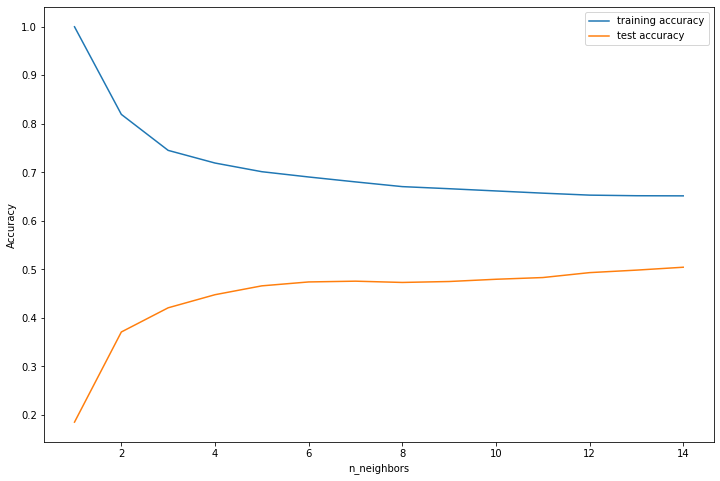

In [72]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 15)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [73]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1           # +1因为index start 0
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 14


In [74]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm ='auto',  
                n_neighbors = opt_neighbors) 



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

Training Score: 0.6515
Testing Score: 0.5045


<br><h4>2. Ordinary Least Squares Regression</h4> 
Purpose: In order to work with statsmodels, we need to concatenate our training data on the 'x' side (X_train) and our training data on the 'y' side (y_train). Then, we can begin building models and analyze their results.<hr>


In [75]:
# # formatting each explanatory variable for statsmodels
# for val in X_scaled_df:
#     print(f"chef_train['{val}'] +")

In [76]:
# # merging X_train and y_train so that they can be used in statsmodels
# chef_train = pd.concat([X_train, y_train], axis = 1)


# # Step 1: build a model
# lm_best = smf.ols(formula =  """chef_train['REVENUE'] ~ chef_train['TOTAL_MEALS_ORDERED'] +
#                                                         chef_train['UNIQUE_MEALS_PURCH'] +
#                                                         chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
#                                                         chef_train['PRODUCT_CATEGORIES_VIEWED'] +
#                                                         chef_train['AVG_TIME_PER_SITE_VISIT'] +
#                                                         chef_train['MOBILE_NUMBER'] +
#                                                         chef_train['CANCELLATIONS_BEFORE_NOON'] +
#                                                         chef_train['CANCELLATIONS_AFTER_NOON'] +
#                                                         chef_train['TASTES_AND_PREFERENCES'] +
#                                                         chef_train['PC_LOGINS'] +
#                                                         chef_train['MOBILE_LOGINS'] +
#                                                         chef_train['WEEKLY_PLAN'] +
#                                                         chef_train['EARLY_DELIVERIES'] +
#                                                         chef_train['LATE_DELIVERIES'] +
#                                                         chef_train['PACKAGE_LOCKER'] +
#                                                         chef_train['REFRIGERATED_LOCKER'] +
#                                                         chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
#                                                         chef_train['AVG_PREP_VID_TIME'] +
#                                                         chef_train['LARGEST_ORDER_SIZE'] +
#                                                         chef_train['MASTER_CLASSES_ATTENDED'] +
#                                                         chef_train['AVG_CLICKS_PER_VISIT'] +
#                                                         chef_train['TOTAL_PHOTOS_VIEWED'] +
#                                                         chef_train['m_FAMILY_NAME'] +
#                                                         chef_train['number_of_names'] +
#                                                         chef_train['number_of_names_out'] +
#                                                         chef_train['personal_email'] +
#                                                         chef_train['professional_email'] +
#                                                         chef_train['MEDIAN_MEAL_RATING_1'] +
#                                                         chef_train['MEDIAN_MEAL_RATING_2'] +
#                                                         chef_train['MEDIAN_MEAL_RATING_4'] +
#                                                         chef_train['MEDIAN_MEAL_RATING_5'] +
#                                                         chef_train['flag_MOBILE_LOGINS'] +
#                                                         chef_train['flag_PC_LOGINS'] +
#                                                         chef_train['flag_EARLY_DELIVERIES'] +
#                                                         chef_train['flag_WEEKLY_PLAN'] +
#                                                         chef_train['flag_CANCELLATIONS_AFTER_NOON'] +
#                                                         chef_train['out_TOTAL_MEALS_ORDERED'] +
#                                                         chef_train['out_UNIQUE_MEALS_PURCH'] +
#                                                         chef_train['out_CONTACTS_W_CUSTOMER_SERVICE_hi'] +
#                                                         chef_train['out_CONTACTS_W_CUSTOMER_SERVICE_lo'] +
#                                                         chef_train['out_AVG_TIME_PER_SITE_VISIT'] +
#                                                         chef_train['out_CANCELLATIONS_BEFORE_NOON'] +
#                                                         chef_train['out_CANCELLATIONS_AFTER_NOON'] +
#                                                         chef_train['out_WEEKLY_PLAN'] +
#                                                         chef_train['out_LATE_DELIVERIES'] +
#                                                         chef_train['out_AVG_PREP_VID_TIME'] +
#                                                         chef_train['out_LARGEST_ORDER_SIZE'] +
#                                                         chef_train['out_MASTER_CLASSES_ATTENDED'] +
#                                                         chef_train['out_AVG_CLICKS_PER_VISIT_hi'] +
#                                                         chef_train['out_AVG_CLICKS_PER_VISIT_lo'] +
#                                                         chef_train['out_TOTAL_PHOTOS_VIEWED'] +
#                                                         chef_train['change_LARGEST_ORDER_SIZE'] +
#                                                         chef_train['change_TOTAL_MEALS_ORDERED'] +
#                                                         chef_train['change_MOBILE_LOGINS'] +
#                                                         chef_train['change_MASTER_CLASSES_ATTENDED']""",
#                                                         data = chef_train)



# # Step 2: fit the model based on the data
# results = lm_best.fit()



# # Step 3: analyze the summary output
# print(results.summary())

<br><h5> Apply OLS regression model in scikit-learn</h5> <br>
INSTANTIATE a LinearRegression( ) object<br>
FIT the training data to the model object<br>
PREDICT using the testing data<br>
SCORE your results, rounding to four decimal places<br>

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
# creating a hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]
}

# INSTANTIATING the model object without hyperparameters
lnreg = LinearRegression()

# GridSearchCV object
lnreg_cv = GridSearchCV(lnreg,
                         param_grid,
                         cv=10)

# FITTING to the data set (due to cross-validation)
lnreg_cv.fit(X_train, y_train)

lnreg_cv

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
# printing the optimal parameters and best score
print("Tuned Parameters  :", lnreg_cv.best_params_)
print("Tuned CV AUC      :", lnreg_cv.best_score_.round(2))

Tuned Parameters  : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Tuned CV AUC      : 0.66


In [79]:
# applying modelin scikit-learn

# INSTANTIATING a model object
lr = LinearRegression(**lnreg_cv.best_params_)              #INSTANTIATE 


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test,y_test).round(4))
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test,y_test)

Training Score: 0.7164
Testing Score: 0.6194


<br><h4>3. Ridge Regression Model</h4> 

In [80]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

# SCORING the results
print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.7164
Testing Score: 0.6191


<br><h4>4.  Lasso Regression Model</h4> 

In [81]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test,y_test).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test,y_test).round(4)


Training Score: 0.7159
Testing Score: 0.621


<br><h4>5.  Bayesian ARD Regression Model</h4> 

In [82]:
# # INSTANTIATING a model object
# ard_model = sklearn.linear_model.ARDRegression()


# # FITTING the training data
# ard_fit = ard_model.fit(X_train, y_train)


# # PREDICTING on new data
# ard_pred = ard_fit.predict(X_test)


# print('Training Score:', ard_model.score(X_train, y_train).round(4))
# print('Testing Score:',  ard_model.score(X_test,y_test).round(4))


# # saving scoring data for future use
# ard_train_score = ard_model.score(X_train, y_train).round(4)
# ard_test_score  = ard_model.score(X_test,y_test).round(4)

<br><h4>6. Random Forest Regression Model</h4> 

In [83]:

rfr = RandomForestRegressor(n_estimators=50,
                           warm_start=True,
                           bootstrap=True,
                           criterion='mse')
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
print('Training Score:', rfr.score(X_train, y_train).round(4))
print('Testing Score:',  rfr.score(X_test,y_test).round(4))
rfr_train_score = rfr.score(X_train, y_train)
rfr_test_score = rfr.score(X_test,y_test)

Training Score: 0.9698
Testing Score: 0.7481


<br><h4>7. GBDT Regression Model</h4> 

In [84]:
gbdt = GradientBoostingRegressor(max_depth=2,
                                subsample=0.9,
                                min_samples_leaf=0.009,
                                max_features=0.9,
                                n_estimators=65,
                                random_state=222)
gbdt.fit(X_train, y_train)
gbdt_pred = gbdt.predict(X_test)
# SCORING the results
print('Training Score:', gbdt.score(X_train, y_train).round(4))
print('Testing Score:',  gbdt.score(X_test,y_test).round(4))
gbdt_train_score = gbdt.score(X_train, y_train)
gbdt_test_score = gbdt.score(X_test,y_test)

Training Score: 0.8376
Testing Score: 0.7583


***
***

<h2>STEP IV: Compare Results</h2> <br>

Let's compare the results of each model. In the interest of time, this code has already been written.

In [85]:



# creating a dictionary for model results
model_performance = {'Model'    : ['knn','OLS', 'Ridge', 'Lasso','Forest Regression','GBDT'],  # 'ARD'
           
                     'Training' : [knn_opt_score_train,
                                   lr_train_score, 
                                   ridge_train_score,
                                   lasso_train_score,
                                   rfr_train_score,
                                   gbdt_train_score],  # ard_train_score
           
                     'Testing'  : [knn_opt_score_test,
                                   lr_test_score, 
                                   ridge_test_score,
                                   lasso_test_score, 
                                   rfr_test_score,
                                   gbdt_test_score]} # ard_test_score


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)

# model_performance['Total'] = model_performance['Training'] + model_performance['Testing']
# model_performance['Difference'] = abs(model_performance['Training'] - model_performance['Testing'])

model_performance.round(3)

,Model,Training,Testing
0,knn,0.652,0.504
1,OLS,0.716,0.619
2,Ridge,0.716,0.619
3,Lasso,0.716,0.621
4,Forest Regression,0.970,0.748
5,GBDT,0.838,0.758


#################################################################################
Final Model Score (score)
################################################################################

In [86]:
test_score = gbdt.score(X_test,y_test).round(4)
test_score

0.7583